1.

In [1]:
!pip install requests matplotlib

2.

In [2]:
import requests
import time

iss_data = []

for i in range(100):
    try:
        response = requests.get("http://api.open-notify.org/iss-now.json", timeout=5)
        response.raise_for_status()
        data = response.json()

        if 'iss_position' in data:
            position = data['iss_position']
            timestamp = data['timestamp']
            iss_data.append({
                'latitude': float(position['latitude']),
                'longitude': float(position['longitude']),
                'timestamp': timestamp
            })
            print(f"{i+1}/100 Data point collected.")
        else:
            print(f"{i+1}/100 Unexpected data format. Skipping...")

    except Exception as e:
        print(f"{i+1}/100 Failed to collect data: {e}")
    
    time.sleep(10)

1/100 Failed to collect data: HTTPConnectionPool(host='api.open-notify.org', port=80): Max retries exceeded with url: /iss-now.json (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x00000252E185D040>, 'Connection to api.open-notify.org timed out. (connect timeout=5)'))
2/100 Data point collected.
3/100 Data point collected.
4/100 Data point collected.
5/100 Data point collected.
6/100 Failed to collect data: HTTPConnectionPool(host='api.open-notify.org', port=80): Max retries exceeded with url: /iss-now.json (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x00000252E2C96DB0>, 'Connection to api.open-notify.org timed out. (connect timeout=5)'))
7/100 Data point collected.
8/100 Data point collected.
9/100 Failed to collect data: HTTPConnectionPool(host='api.open-notify.org', port=80): Max retries exceeded with url: /iss-now.json (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x00000252E2C97350>, 'Connec

In [3]:
print("Valid data points collected:", len(iss_data))

Valid data points collected: 85


In [4]:
for i in range(25):
    try:
        response = requests.get("http://api.open-notify.org/iss-now.json", timeout=5)
        response.raise_for_status()
        data = response.json()

        if 'iss_position' in data:
            position = data['iss_position']
            timestamp = data['timestamp']
            iss_data.append({
                'latitude': float(position['latitude']),
                'longitude': float(position['longitude']),
                'timestamp': timestamp
            })
            print(f"Valid data point {len(iss_data)} collected.")
        else:
            print("Unexpected data format. Skipping...")

    except Exception as e:
        print(f"Failed to collect data: {e}")
    
    time.sleep(10)

Valid data point 86 collected.
Valid data point 87 collected.
Valid data point 88 collected.
Valid data point 89 collected.
Valid data point 90 collected.
Valid data point 91 collected.
Valid data point 92 collected.
Valid data point 93 collected.
Valid data point 94 collected.
Failed to collect data: HTTPConnectionPool(host='api.open-notify.org', port=80): Max retries exceeded with url: /iss-now.json (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x00000252E2C97500>, 'Connection to api.open-notify.org timed out. (connect timeout=5)'))
Valid data point 95 collected.
Valid data point 96 collected.
Valid data point 97 collected.
Failed to collect data: HTTPConnectionPool(host='api.open-notify.org', port=80): Max retries exceeded with url: /iss-now.json (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x00000252E2C969C0>, 'Connection to api.open-notify.org timed out. (connect timeout=5)'))
Valid data point 98 collected.
Valid data po

In [5]:
print("Valid data points collected:", len(iss_data))

Valid data points collected: 106


3.

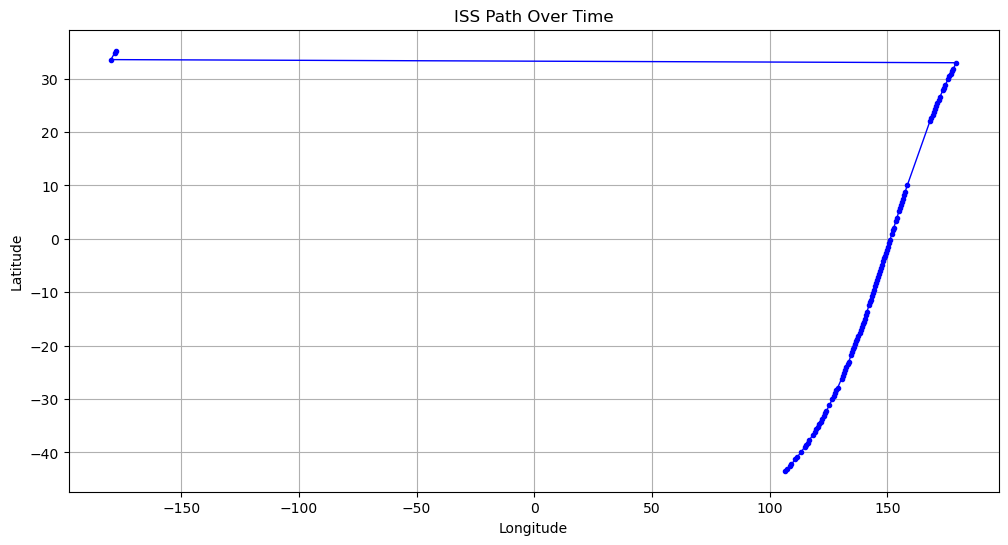

In [6]:
import matplotlib.pyplot as plt

lats = [point['latitude'] for point in iss_data]
lons = [point['longitude'] for point in iss_data]

plt.figure(figsize=(12, 6))
plt.title('ISS Path Over Time')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.plot(lons, lats, color='blue', marker='o', markersize=3, linewidth=1)
plt.grid(True)
plt.show()